In [39]:
import pandas as pd
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('data/processed/credit_card_feature_engineered.csv')


In [40]:
pd.options.display.max_columns = 50

In [41]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,age_group,delay_score,util_ratio_1,util_ratio_avg,payment_ratio_1,payment_ratio_avg,late_payment_count,severe_late_count,payment_improving,payment_worsening,max_consecutive_late,age_education,gender_marriage,young_single,high_limit_low_education,financial_stress,good_payer_score,recent_vs_historical_bill,payment_acceleration
0,20000.0,Female,University,Married,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,21-30,4,0.195650,0.128400,0.000000,0.089399,2,0,0,1,2,0,Female_Married,0,0,1,1,2568.000000,229.666667
1,120000.0,Female,University,Single,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,21-30,4,0.022350,0.019692,0.000000,0.282008,2,0,1,0,1,0,Female_Single,0,0,0,1,0.709539,0.666001
2,90000.0,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,31-40,0,0.324878,0.210463,0.051915,0.070705,0,0,0,0,0,0,Female_Single,0,0,1,2,1.267538,0.573754
3,50000.0,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,31-40,0,0.939800,0.963427,0.042561,0.036113,0,0,0,0,0,0,Female_Married,0,0,2,1,1.664467,1.645334
4,50000.0,Male,University,Married,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,51-60,0,0.172340,0.334147,0.232072,0.971192,0,0,0,0,0,0,Male_Married,0,0,0,2,0.846369,4.693954


In [42]:
numeric_cols = df.select_dtypes(include='number')

In [43]:
df_corr = df.corr(numeric_only=True)['DEFAULT'].sort_values(ascending=False)

In [44]:
df_corr

DEFAULT                      1.000000
late_payment_count           0.398394
PAY_1                        0.396019
max_consecutive_late         0.388552
delay_score                  0.376034
PAY_2                        0.327093
PAY_3                        0.286999
PAY_4                        0.269055
PAY_5                        0.260850
payment_worsening            0.244754
PAY_6                        0.244437
financial_stress             0.234318
severe_late_count            0.172065
payment_improving            0.107755
util_ratio_avg               0.099587
util_ratio_1                 0.086168
AGE                          0.013890
age_education               -0.005094
BILL_AMT6                   -0.005372
recent_vs_historical_bill   -0.005469
payment_ratio_avg           -0.006535
BILL_AMT5                   -0.006760
payment_ratio_1             -0.007138
BILL_AMT4                   -0.010156
payment_acceleration        -0.010812
BILL_AMT3                   -0.014076
BILL_AMT2   

In [45]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'age_group', 'delay_score', 'util_ratio_1', 'util_ratio_avg',
       'payment_ratio_1', 'payment_ratio_avg', 'late_payment_count',
       'severe_late_count', 'payment_improving', 'payment_worsening',
       'max_consecutive_late', 'age_education', 'gender_marriage',
       'young_single', 'high_limit_low_education', 'financial_stress',
       'good_payer_score', 'recent_vs_historical_bill',
       'payment_acceleration'],
      dtype='object')

In [46]:
req_cols = []
for col in df.columns:
    if col in df.select_dtypes(include='number'):
        if df[col].corr(df['DEFAULT']) > 0.1 or df[col].corr(df['DEFAULT']) < -0.1:
            print(col)
            req_cols.append(col)

LIMIT_BAL
PAY_1
PAY_2
PAY_3
PAY_4
PAY_5
PAY_6
DEFAULT
delay_score
late_payment_count
severe_late_count
payment_improving
payment_worsening
max_consecutive_late
financial_stress
good_payer_score


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2742: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

In [47]:
df = pd.concat([df[req_cols], df.select_dtypes(exclude='number')], axis=1)
df

,LIMIT_BAL,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT,delay_score,late_payment_count,severe_late_count,payment_improving,payment_worsening,max_consecutive_late,financial_stress,good_payer_score,SEX,EDUCATION,MARRIAGE,age_group,gender_marriage
0,20000.0,2,2,0,0,0,0,1,4,2,0,0,1,2,1,1,Female,University,Married,21-30,Female_Married
1,120000.0,0,2,0,0,0,2,1,4,2,0,1,0,1,0,1,Female,University,Single,21-30,Female_Single
2,90000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,Female,University,Single,31-40,Female_Single
3,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Female,University,Married,31-40,Female_Married
4,50000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Male,University,Married,51-60,Male_Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,Male,High School,Married,31-40,Male_Married
29996,150000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Male,High School,Single,41-50,Male_Single
29997,30000.0,4,3,2,0,0,0,1,9,3,2,0,1,3,1,2,Male,University,Single,31-40,Male_Single
29998,80000.0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,1,Male,High School,Married,41-50,Male_Married


In [51]:
df = pd.get_dummies(df, dtype=int)

In [60]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
X = df.drop(columns=['DEFAULT'])
y = df['DEFAULT']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
X_train.shape

(21000, 36)

In [67]:
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)


In [76]:
logic = LogisticRegression(C=0.01)
logic.fit(X_train_scaled,y_train)
pred = logic.predict(X_test_scaled)

In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.65      0.32      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



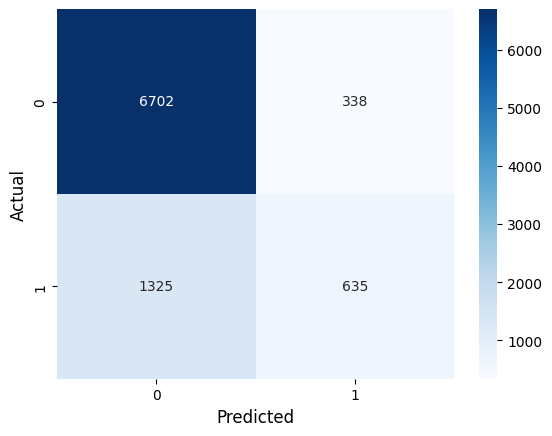

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

Loading data...
Preparing features...
Dataset shape: (30000, 36)
Target distribution: {0: 23364, 1: 6636}

Running Logistic Regression with Grid Search...
Starting Grid Search...
Fitting 5 folds for each of 252 candidates, totalling 1260 fits

Evaluating model...
LOGISTIC REGRESSION RESULTS

Best Parameters:
  classifier__C: 0.1
  classifier__class_weight: balanced
  classifier__penalty: l2
  classifier__solver: liblinear

Best Cross-Validation Score (ROC-AUC): 0.7580
Test Set ROC-AUC: 0.7350

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4673
           1       0.47      0.55      0.51      1327

    accuracy                           0.77      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.77      0.77      6000


Confusion Matrix:
[[3870  803]
 [ 602  725]]

Analyzing feature importance...

Top 15 Most Important Features:
                     feature  coefficie

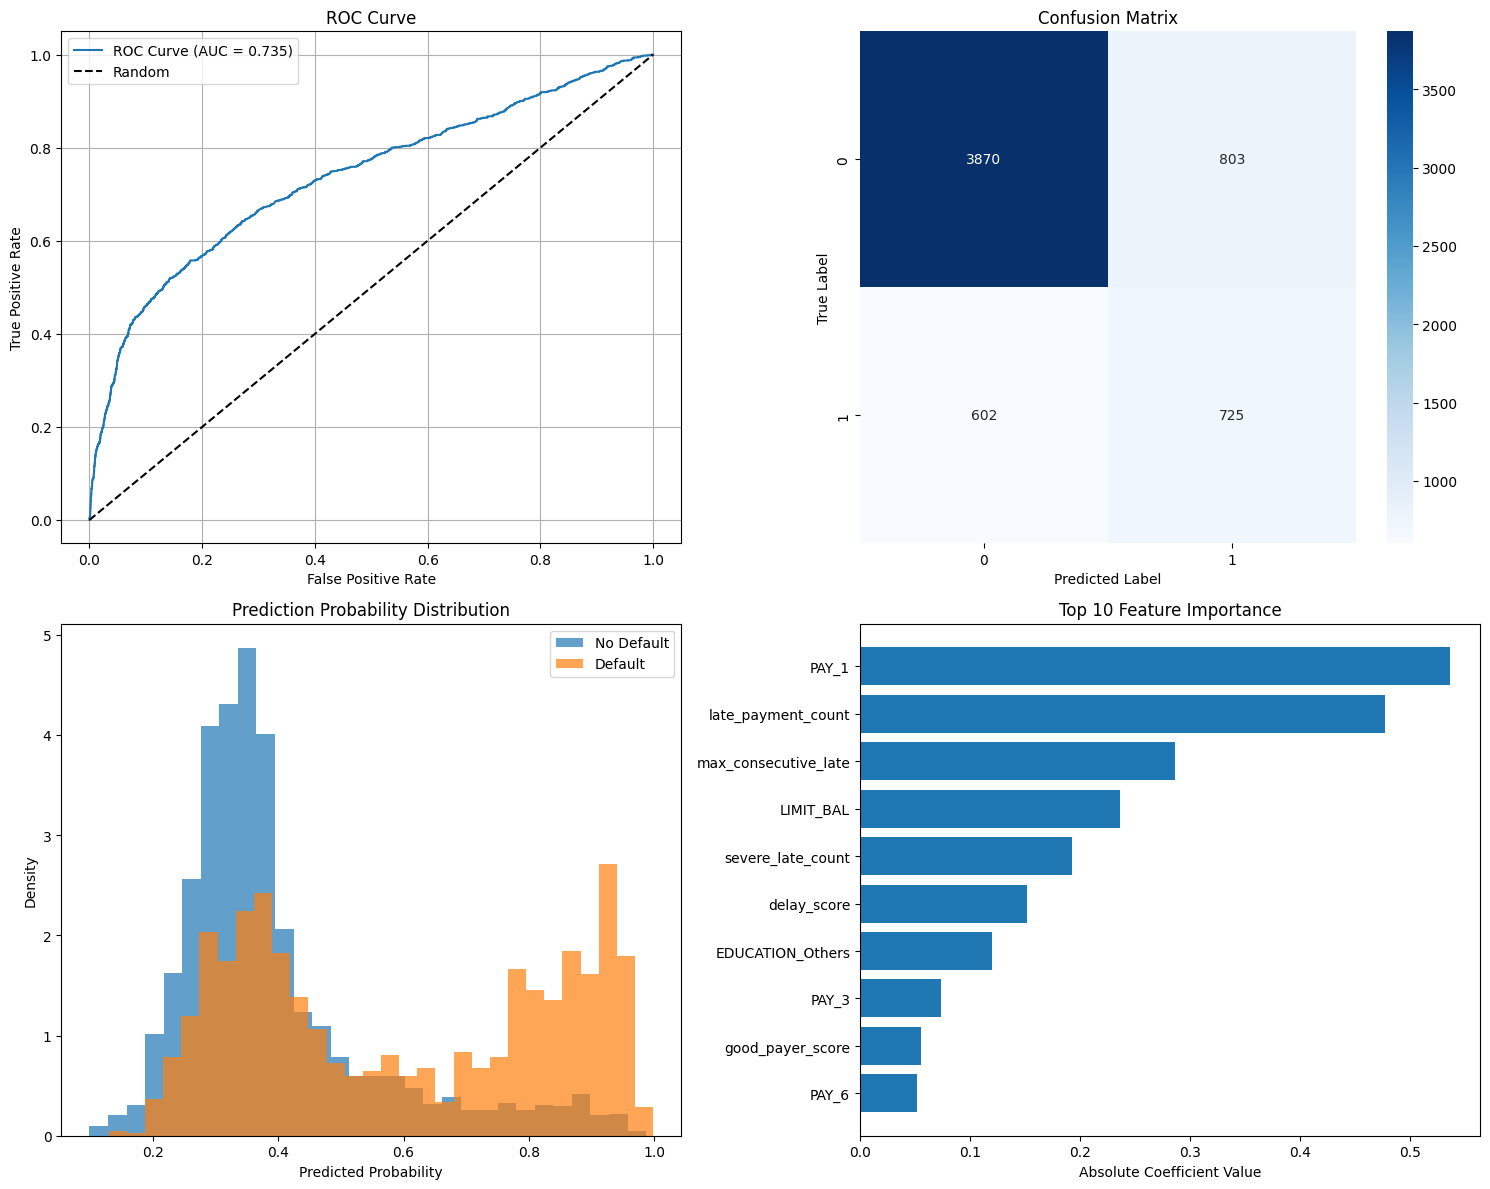


Additional Analysis Options:
1. results['grid_search'].cv_results_ - Detailed CV results
2. Cross-validation scores for different parameters
3. Learning curves
4. Threshold optimization


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load and prepare data
def load_and_prepare_data(file_path):
    """Load and prepare the credit card default dataset"""
    df = pd.read_csv(file_path)
    
    # Basic feature engineering
    df['util_ratio'] = df['BILL_AMT1'] / (df['LIMIT_BAL'] + 1)
    df['payment_ratio'] = df['PAY_AMT1'] / (df['BILL_AMT1'] + 1)
    
    # Late payment count
    pay_cols = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
    df['late_payment_count'] = (df[pay_cols] > 0).sum(axis=1)
    
    # Bill statistics
    bill_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    df['bill_mean'] = df[bill_cols].mean(axis=1)
    df['bill_std'] = df[bill_cols].std(axis=1)
    
    # Payment statistics
    pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
    df['pay_mean'] = df[pay_amt_cols].mean(axis=1)
    
    # Handle infinite values
    df = df.replace([np.inf, -np.inf], 0)
    df = df.fillna(0)
    
    return df

# Feature selection and preprocessing
def prepare_features(df, target_column='default payment next month'):
    """Prepare features for modeling"""
    
    # Separate features and target
    if target_column not in df.columns:
        # Try alternative column names
        possible_targets = ['default.payment.next.month', 'DEFAULT', 'default', 'target']
        for col in possible_targets:
            if col in df.columns:
                target_column = col
                break
    
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Remove ID column if exists
    if 'ID' in X.columns:
        X = X.drop(columns=['ID'])
    
    # Encode categorical variables if needed
    categorical_cols = X.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
    
    return X, y

# Logistic Regression with Grid Search
def logistic_regression_gridsearch(X, y, test_size=0.2, random_state=42):
    """
    Perform Logistic Regression with comprehensive Grid Search
    """
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )
    
    # Create pipeline with scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(random_state=random_state, max_iter=1000))
    ])
    
    # Comprehensive parameter grid
    param_grid = {
        'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'classifier__penalty': ['l1', 'l2', 'elasticnet'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 3}]
    }
    
    # Handle solver-penalty compatibility
    param_grid_compatible = [
        # L1 penalty with liblinear
        {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1'],
            'classifier__solver': ['liblinear'],
            'classifier__class_weight': [None, 'balanced', {0: 1, 1: 2}]
        },
        # L2 penalty with liblinear
        {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l2'],
            'classifier__solver': ['liblinear'],
            'classifier__class_weight': [None, 'balanced', {0: 1, 1: 2}]
        },
        # L1, L2, elasticnet with saga
        {
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__penalty': ['l1', 'l2', 'elasticnet'],
            'classifier__solver': ['saga'],
            'classifier__class_weight': [None, 'balanced', {0: 1, 1: 2}],
            'classifier__l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Only used with elasticnet
        }
    ]
    
    # Grid search with cross-validation
    cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    grid_search = GridSearchCV(
        pipeline,
        param_grid_compatible,
        cv=cv_strategy,
        scoring='roc_auc',  # Good for imbalanced datasets
        n_jobs=-1,
        verbose=1,
        return_train_score=True
    )
    
    print("Starting Grid Search...")
    grid_search.fit(X_train, y_train)
    
    # Get best model
    best_model = grid_search.best_estimator_
    
    # Predictions
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    
    # Results dictionary
    results = {
        'best_model': best_model,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'grid_search': grid_search,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'feature_names': X.columns.tolist()
    }
    
    return results

# Evaluation and visualization
def evaluate_model(results):
    """Comprehensive model evaluation"""
    
    best_model = results['best_model']
    y_test = results['y_test']
    y_pred = results['y_pred']
    y_pred_proba = results['y_pred_proba']
    
    print("="*50)
    print("LOGISTIC REGRESSION RESULTS")
    print("="*50)
    
    print(f"\nBest Parameters:")
    for param, value in results['best_params'].items():
        print(f"  {param}: {value}")
    
    print(f"\nBest Cross-Validation Score (ROC-AUC): {results['best_score']:.4f}")
    
    # Test set performance
    test_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Test Set ROC-AUC: {test_auc:.4f}")
    
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return test_auc

# Feature importance analysis
def analyze_feature_importance(results, top_n=15):
    """Analyze and plot feature importance"""
    
    best_model = results['best_model']
    feature_names = results['feature_names']
    
    # Get coefficients from logistic regression
    if hasattr(best_model.named_steps['classifier'], 'coef_'):
        coefficients = best_model.named_steps['classifier'].coef_[0]
        
        # Create feature importance dataframe
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False)
        
        print(f"\nTop {top_n} Most Important Features:")
        print(importance_df.head(top_n).to_string(index=False))
        
        return importance_df
    else:
        print("No feature coefficients available")
        return None

# Visualization functions
def plot_results(results, importance_df=None):
    """Plot model results"""
    
    y_test = results['y_test']
    y_pred_proba = results['y_pred_proba']
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = roc_auc_score(y_test, y_pred_proba)
    
    axes[0, 0].plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
    axes[0, 0].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[0, 0].set_xlabel('False Positive Rate')
    axes[0, 0].set_ylabel('True Positive Rate')
    axes[0, 0].set_title('ROC Curve')
    axes[0, 0].legend()
    axes[0, 0].grid(True)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, results['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
    axes[0, 1].set_title('Confusion Matrix')
    axes[0, 1].set_ylabel('True Label')
    axes[0, 1].set_xlabel('Predicted Label')
    
    # Prediction Distribution
    axes[1, 0].hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, label='No Default', density=True)
    axes[1, 0].hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, label='Default', density=True)
    axes[1, 0].set_xlabel('Predicted Probability')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title('Prediction Probability Distribution')
    axes[1, 0].legend()
    
    # Feature Importance (if available)
    if importance_df is not None:
        top_features = importance_df.head(10)
        axes[1, 1].barh(range(len(top_features)), top_features['abs_coefficient'])
        axes[1, 1].set_yticks(range(len(top_features)))
        axes[1, 1].set_yticklabels(top_features['feature'])
        axes[1, 1].set_xlabel('Absolute Coefficient Value')
        axes[1, 1].set_title('Top 10 Feature Importance')
        axes[1, 1].invert_yaxis()
    
    plt.tight_layout()
    plt.show()

# Main execution function
def main():
    """Main function to run the complete analysis"""
    
    # Load data (adjust file path as needed)
    print("Loading data...")
    # df = load_and_prepare_data('your_dataset.csv')  # Replace with your file path
    
    # For demonstration, create sample data structure
    # Remove this section and uncomment above when using real data
    # np.random.seed(42)
    # n_samples = 1000
    # df = df
    # df = load_and_prepare_data(None)  # This will add engineered features
    # df['default payment next month'] = np.random.choice([0, 1], n_samples, p=[0.78, 0.22])
    
    # Prepare features
    print("Preparing features...")
    X, y = prepare_features(df)
    
    print(f"Dataset shape: {X.shape}")
    print(f"Target distribution: {y.value_counts().to_dict()}")
    
    # Run logistic regression with grid search
    print("\nRunning Logistic Regression with Grid Search...")
    results = logistic_regression_gridsearch(X, y)
    
    # Evaluate model
    print("\nEvaluating model...")
    test_auc = evaluate_model(results)
    
    # Analyze feature importance
    print("\nAnalyzing feature importance...")
    importance_df = analyze_feature_importance(results)
    
    # Plot results
    print("\nGenerating plots...")
    plot_results(results, importance_df)
    
    return results, importance_df

if __name__ == "__main__":
    # Run the complete analysis
    results, importance_df = main()
    
    # Additional analysis you can perform:
    print("\nAdditional Analysis Options:")
    print("1. results['grid_search'].cv_results_ - Detailed CV results")
    print("2. Cross-validation scores for different parameters")
    print("3. Learning curves")
    print("4. Threshold optimization")